In [1]:
from awrams.calibration.support import *
from os.path import join
from awrams.utils import gis
from awrams.utils import datetools as dt
from awrams.utils import extents
from awrams.utils.settings_manager import get_settings

In [2]:
#from awrams.calibration.launch_calibration import run_from_pickle
#run_from_pickle('./test_cal.pkl')

In [3]:
paths = get_settings('data_paths')

cal_extents = join(paths.CATCH_PATH,'calibration_extents_5k.nc')
nces = gis.ExtentStoreNC(cal_extents,'r')

catch_list_fn = join(paths.CATCH_PATH,'Catchment_IDs.csv')

catch_df = open(catch_list_fn).readlines()
cids = [k.strip().zfill(6) for k in catch_df[1:]]

extent_map = dict([(e,nces[e]) for e in cids[1:3]])

extent_map

{'105001': origin: -15.2,143.6, shape: (9, 8), cell_size: 0.05,
 '107002': origin: -15.65,145.15, shape: (6, 5), cell_size: 0.05}

In [4]:

run_period = dt.dates('1990 - 2011')
eval_period = dt.dates('1990 - 2011')

from awrams.calibration.optimizers import sce

evolver_spec = EvolverSpec(sce.CCEvolver,evolver_run_args=dict(n_offspring=1,n_evolutions=5,elitism=2.0))

optimizer_spec = OptimizerSpec(sce.ShuffledOptimizer,evolver_spec=evolver_spec,n_complexes=5,max_nsni=1000,min_complexes=1,max_eval=1000) #n_complex 14

#optimizer_spec = OptimizerSpec(SobolOptimizer,threshold = 0.005,max_eval =10000)

from awrams.utils.nodegraph.nodes import callable_to_funcspec

from awrams.calibration.objectives import test_objectives as tobj
local_objfspec = ObjectiveFunctionSpec(tobj.TestLocalSingle)

#+++ Remove callable_to_funcspec references (internalise in ObjectiveSpec)
global_objfspec = callable_to_funcspec(tobj.TestGlobalSingle)

#local_objfspec = ObjectiveFunctionSpec(tobj.LocalQTotal)
#global_objfspec = callable_to_funcspec(tobj.GlobalQTotal)

# +++
#Possibly refactor/relocate observations;  ie should they be part of objectives at all/specific to each objective?
observations=dict(qtot=join(paths.OBS_PATH,'qobs_zfill.csv'))

objective_spec = ObjectiveSpec(global_objfspec,local_objfspec,observations,eval_period)

# Con

from awrams.models import awral
from awrams.utils.nodegraph import nodes, graph
node_mapping = awral.get_default_mapping()['mapping']
model = callable_to_funcspec(awral)

from awrams.models.settings import CLIMATOLOGY

node_mapping['solar_clim'] = nodes.monthly_climatology(*CLIMATOLOGY['solar'])
node_mapping['solar_filled'] = nodes.gap_filler('solar_f','solar_clim')
node_mapping['rgt'].inputs[0] = 'solar_filled'


#Build spec dict

Assemble above settings into specification dictionary

In [5]:


'''
User specifiable calibration description
'''
cal_spec = {}
cal_spec['optimizer_spec'] = optimizer_spec
cal_spec['objective_spec'] = objective_spec
cal_spec['extent_map'] = extent_map
cal_spec['run_period'] = run_period
cal_spec['model'] = model
cal_spec['node_mapping'] = node_mapping
#cal_spec['logfile'] = '/short/er4/dss548/calibration_res.h5'
cal_spec['logfile'] = './calres.h5'

#cal_spec['prerun_action'] = callable_to_funcspec(prerun_raijin)
#cal_spec['postrun_action'] = callable_to_funcspec(postrun_raijin)



In [6]:
import sys

#max_nodes = int(sys.argv[1])
#walltime = sys.argv[2]

#cal_spec['logfile'] = '/short/er4/dss548/calfull_%s.h5' % max_nodes

from awrams.calibration import cluster
#cluster.build_pbs_from_cal_spec(cal_spec,walltime,'/short/er4/dss548/calfull_%s.pkl'%max_nodes,'/short/er4/dss548/calfull_%s.pbs'%max_nodes,max_nodes)
cluster.build_pickle_from_spec(cal_spec,1,'test_cal.pkl')


{'catch_node_map': {'105001': [0], '107002': [0]},
 'extent_map': {'105001': origin: -15.2,143.6, shape: (9, 8), cell_size: 0.05,
  '107002': origin: -15.65,145.15, shape: (6, 5), cell_size: 0.05},
 'logfile': './calres.h5',
 'model': {'module': 'awrams.models.awral', 'objtype': 'module'},
 'n_workers': 1,
 'node_alloc': OrderedDict([(0, {'cell_counts': [49, 24], 'catchments': [('105001', {'start_cell': 0, 'ncells': 49}, {'owns': True, 'remote': False}), ('107002', {'start_cell': 0, 'ncells': 24}, {'owns': True, 'remote': False})]})]),
 'node_mapping': {'pref_grid': spatial_from_file([]):{'filename': '/home/dshipman/WGIT/CLEAN/awrams_cm/models/awrams/models/awral/data/spatial_parameters.h5', 'variable': 'parameters/pref', 'preload': False}, 'kdsat_v5_grid': spatial_from_file([]):{'filename': '/home/dshipman/WGIT/CLEAN/awrams_cm/models/awrams/models/awral/data/spatial_parameters.h5', 'variable': 'parameters/kdsat_v5', 'preload': False}, 'tsenc_hrusr': parameter([]):{'min': 10, 'value': 

In [2]:
from awrams.calibration.launch_calibration import run_from_pickle
run_from_pickle('./test_cal.pkl')

n
s:  29107

 evaluating initial population
{}
......................
 running
{'best_params': Score: 0.569589132482, Params: [ 0.03941318  0.03789217  0.07214855  0.82408072  0.92199983  0.96857639
  3.08393983  1.5451794   2.00603256  0.049638    0.46869477  8.9847855
  0.47285554  2.04910222  1.67613136  0.34570536  0.34886143  0.62934172
  0.12895572  1.62575523  1.93201036], Meta: None, 'n_shuffle': 0, 'n_eval': 215}
....
 running
{'best_params': Score: 0.569589132482, Params: [ 0.03941318  0.03789217  0.07214855  0.82408072  0.92199983  0.96857639
  3.08393983  1.5451794   2.00603256  0.049638    0.46869477  8.9847855
  0.47285554  2.04910222  1.67613136  0.34570536  0.34886143  0.62934172
  0.12895572  1.62575523  1.93201036], Meta: None, 'n_shuffle': 1, 'n_eval': 244}

 running
{'best_params': Score: 0.569589132482, Params: [ 0.03941318  0.03789217  0.07214855  0.82408072  0.92199983  0.96857639
  3.08393983  1.5451794   2.00603256  0.049638    0.46869477  8.9847855
  0.4728555

In [3]:
import h5py

In [4]:
r = h5py.File('./calres.h5')

In [6]:
len(r['task_meta'])

0

In [10]:
r['global_score']

<HDF5 dataset "global_score": shape (1002,), type "<f8">

In [16]:
import pandas as pd

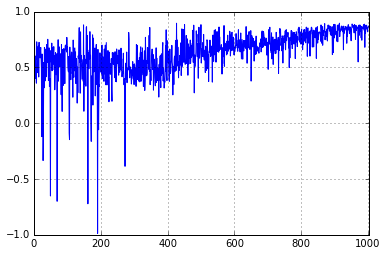

In [18]:
pd.Series(r['local_scores']['qtot_nse'][:,1]).plot()

In [24]:
list(r)

['global_score',
 'local_scores',
 'parameter_name',
 'parameter_values',
 'task_id']

In [32]:
r['parameter_name'][0]

'cgsmax_hrudr'

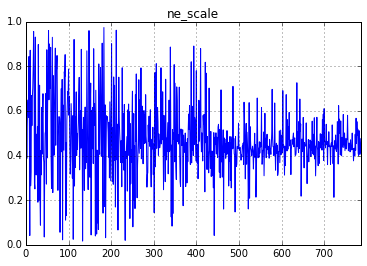

In [74]:
P = 12
pd.Series(r['parameter_values'][215:,P]).plot(title=r['parameter_name'][P])

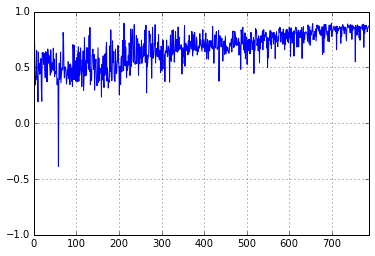

In [59]:
pd.Series(r['local_scores']['qtot_nse'][215:,1]).plot(ylim=[-1,1.0])

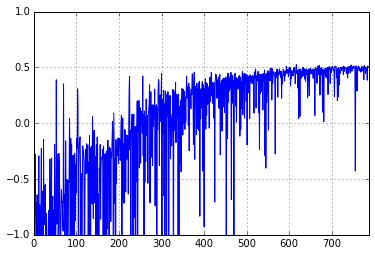

In [60]:
pd.Series(r['local_scores']['qtot_nse'][215:,0]).plot(ylim=[-1,1.0])

In [58]:
r['task_id'][...][215]

'0_0'